In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [77]:
import numpy as np
from functions import loader, splt, fitter, stats

In [40]:
all_data = loader.load_data()
data = loader.remove_duplicates( all_data,
    lambda d: ( d['dep_polymers'], d['side'], d['defects_frac'], d['gamma'] ),
    lambda d: d['runned_replicas']
)
len( data )

86

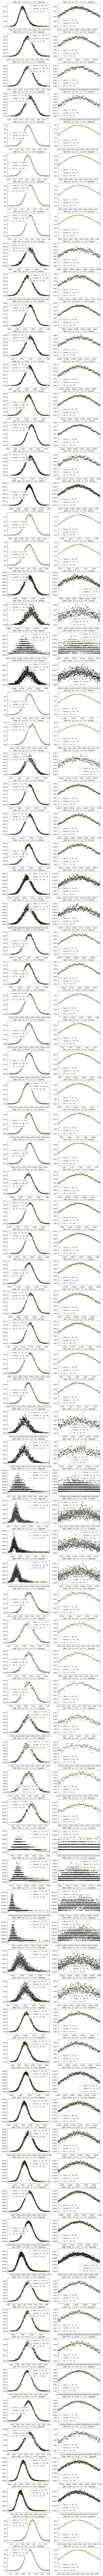

In [75]:
fits, fits_hm = fitter.fits_twocols( data, 0, 0.5, lambda x, h: (x, h), True );

In [44]:
rebinned_fits, rebinned_fits_hm = fitter.fits_twocols( data, 0, 0.5, fitter.rebinner_bywidth( 0.0001 ), False );

C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:834: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [86]:
kurtosis = stats.the_kurtosis( data )

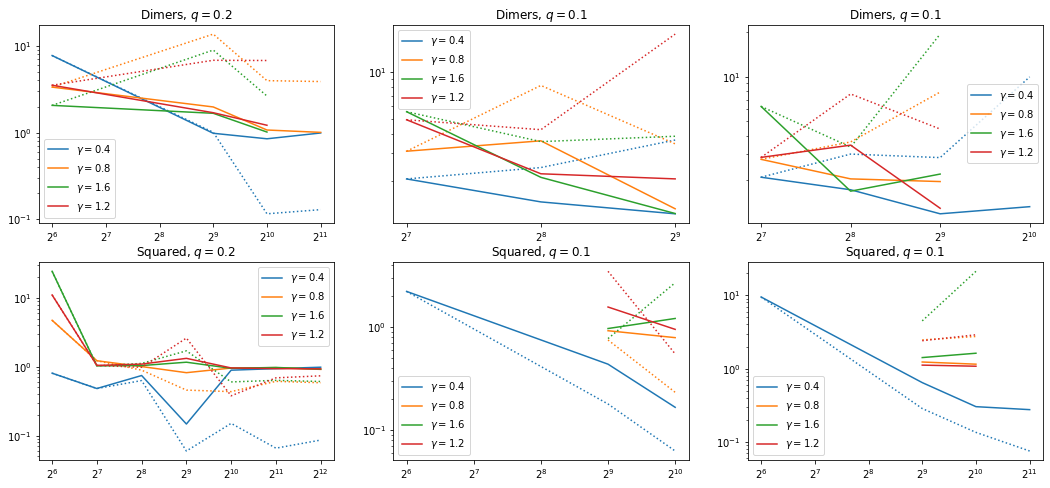

In [74]:
splt.iterate(
    len( data ),
    lambda d: data[d]['dep_polymers'],
    lambda d: data[d]['defects_frac'],
    lambda d: data[d]['gamma'],
    lambda d: data[d]['side'],
    lambda d: [
        fits[d]['GG']['chi2'] / fits[d]['Gauss']['chi2'],
        rebinned_fits[d]['GG']['chi2'] / rebinned_fits[d]['Gauss']['chi2'],
    ],
    lambda r, c, l: [
        { 'label': fr"$\gamma = {l:.1f}$", 'ls': '-' },
        { 'ls': ':'}
    ],
    lambda r, c: fr"{r}, $q = {c:.1f}$",
    True,
    True
)

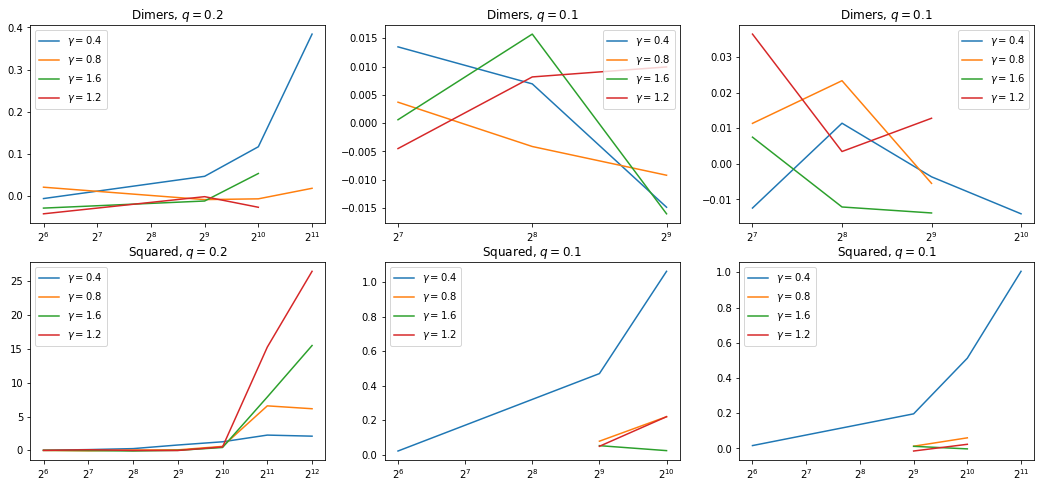

In [89]:
splt.iterate(
    len( data ),
    lambda d: data[d]['dep_polymers'],
    lambda d: data[d]['defects_frac'],
    lambda d: data[d]['gamma'],
    lambda d: data[d]['side'],
    lambda d: [
        kurtosis[d],
    ],
    lambda r, c, l: [
        { 'label': fr"$\gamma = {l:.1f}$" }
    ],
    lambda r, c: fr"{r}, $q = {c:.1f}$",
    True,
    False
)